In [20]:
import sys
import os
from os.path import join

project_root = os.path.dirname(os.path.abspath('..')) 

if project_root not in sys.path:
    sys.path.append(project_root)

from src.NeuralNetwork import NeuralNetwork
from src.layers import ConvolutionalLayer, FlattenLayer, DenseLayer, MaxPoolingLayer, ReLULayer, SigmoidLayer, SoftmaxLayer
from data.MnistDataloader import MnistDataloader
import numpy as np
import random
import matplotlib.pyplot as plt

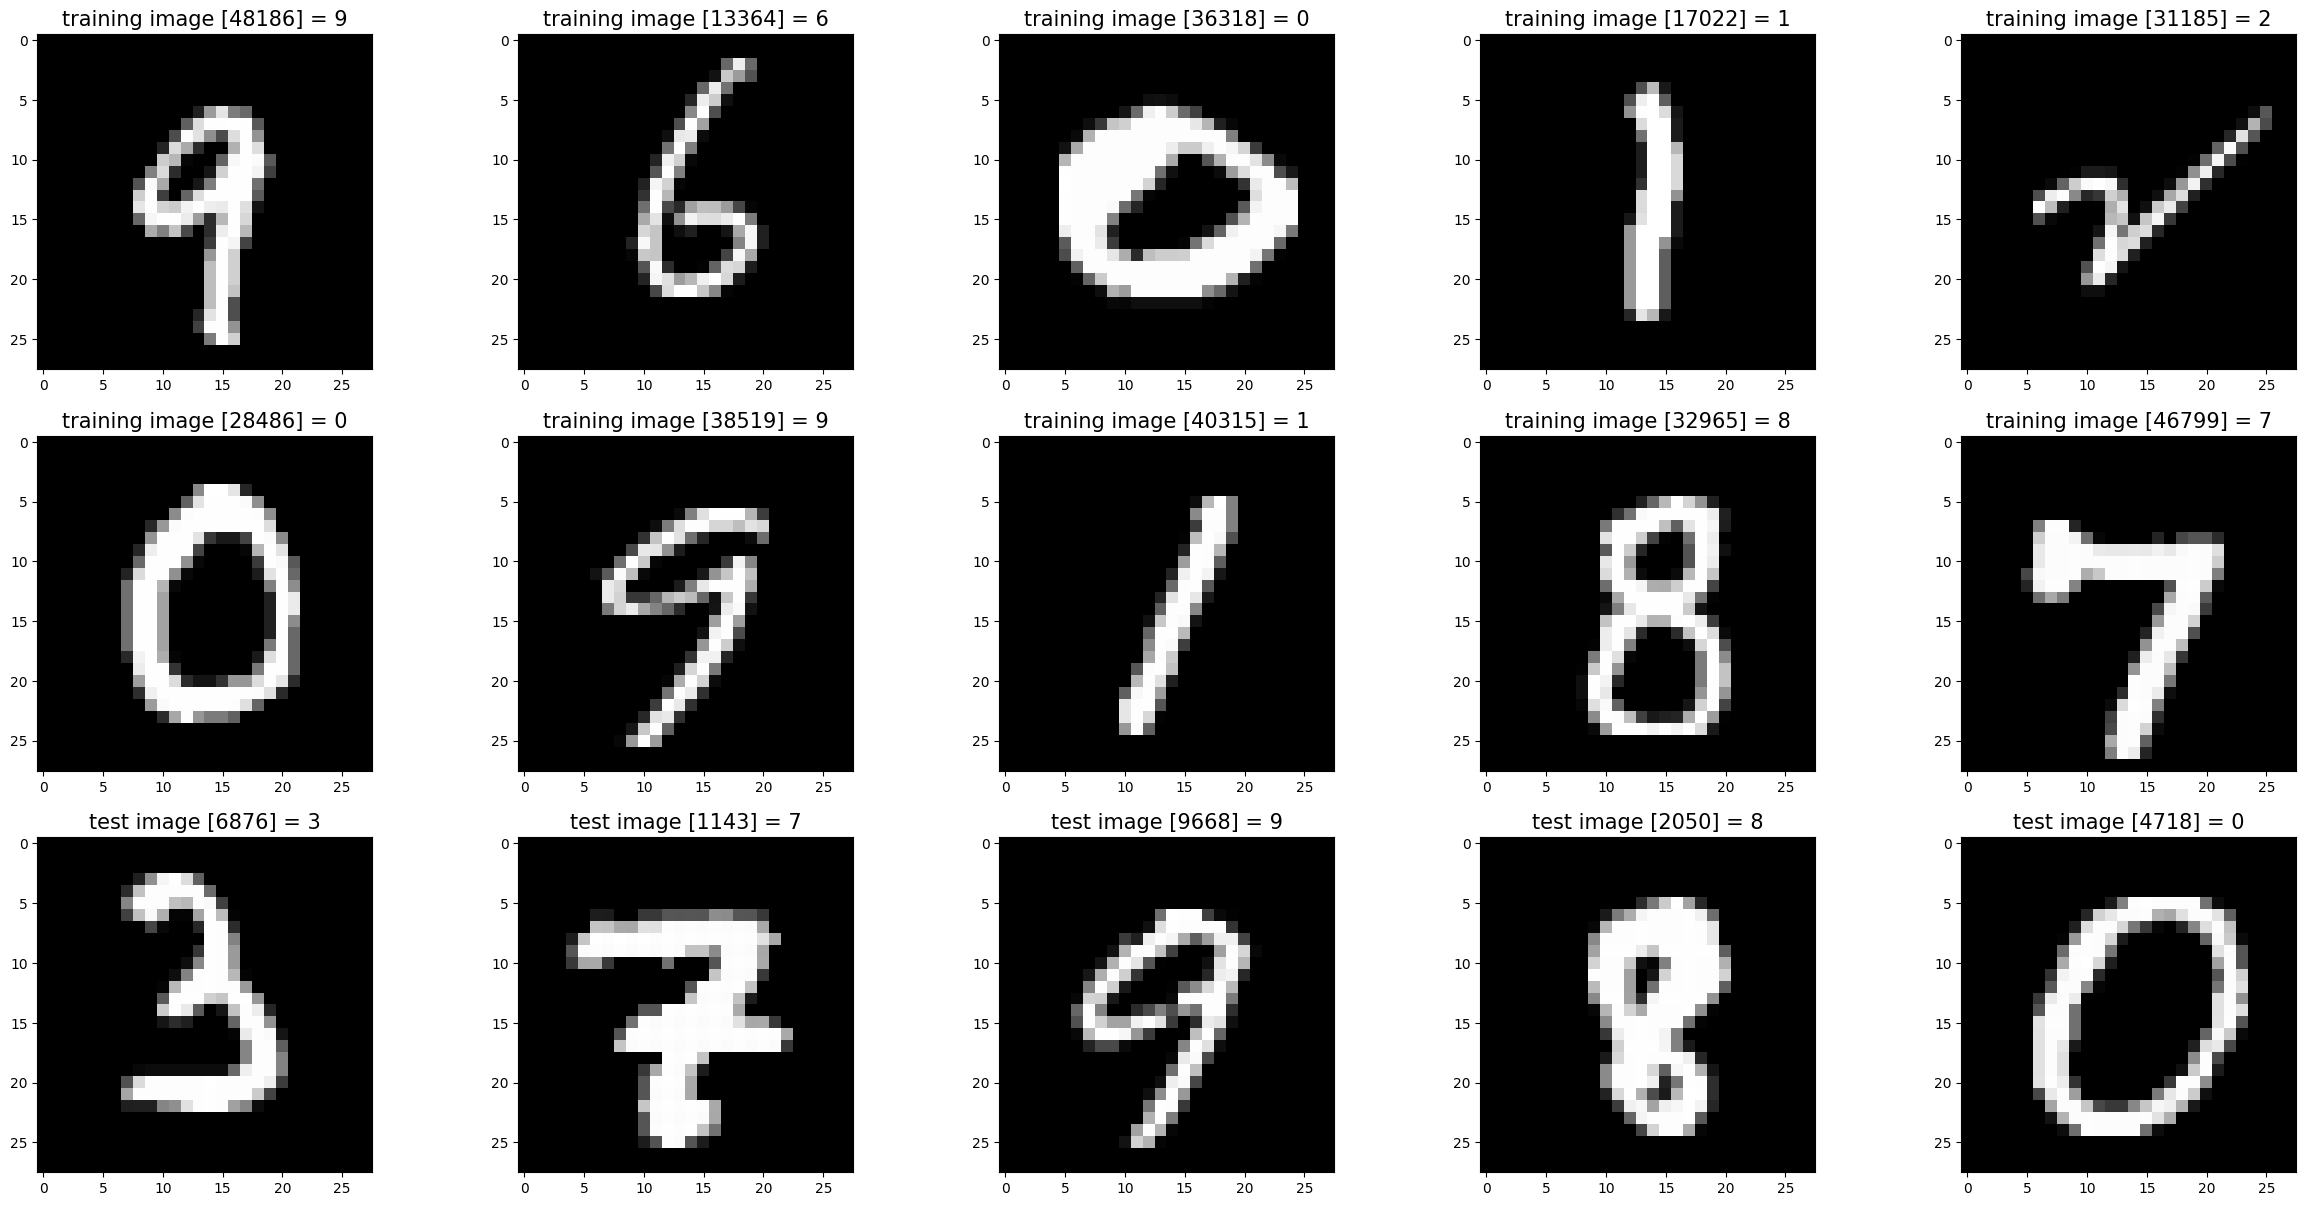

In [21]:
input_path = '../../data/input'
training_images_filepath = join(input_path, '../../data/mnist/train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, '../../data/mnist/train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, '../../data/mnist/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, '../../data/mnist/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [22]:
image = np.array(images_2_show)
image.shape

(15, 28, 28)

In [23]:
image_batch = np.array([
  image,
  image,
  image,
  image,
  image
])

In [24]:
image_batch.shape

(5, 15, 28, 28)

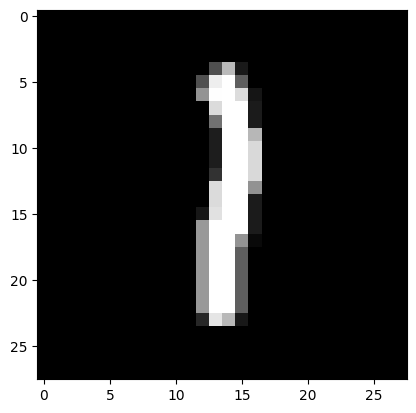

In [25]:
plt.imshow(image_batch[0][3], cmap=plt.cm.gray)

In [26]:
X_train = np.random.normal(size=(100, 5, 20, 20))
y_train = np.random.normal(size=(3, 100))

In [27]:
layers = [
  ConvolutionalLayer(
    name = "Convolution 1",
    next_act_layer="relu",
    output_channels_dim=3,
  ),
  ReLULayer(
    name = "Activation 1"
  ),
  MaxPoolingLayer(
    name = "MaxPooling 1",
    pool_size = (2, 2)
  ),
  ConvolutionalLayer(
    name = "Convolution 2",
    next_act_layer = "relu",
    output_channels_dim=3,
  ),
  ReLULayer(
    name = "Activation 2"
  ),
  ConvolutionalLayer(
    name = "Convolution 3",
    next_act_layer = "relu",
    output_channels_dim=3,
  ),
  ReLULayer(
    name = "Activation 3"
  ),
  MaxPoolingLayer(
    name = "MaxPooling 2",
    pool_size = (2, 2)
  ),
  FlattenLayer(
    name="Flatten 1",
  ),
  DenseLayer(
    name="Dense 1",
    next_act_layer ="softmax",
    output_dim=3
  ),
  SoftmaxLayer(
    name = "Activation 4"
  )
]

In [28]:
nn = NeuralNetwork(
  layers = layers,
  loss_type="cce",
  optimizer_type="adam",
  seed=1
)

In [29]:
nn.build((
  X_train.shape[1],
  X_train.shape[2],
  X_train.shape[3]
))

In [30]:
nn.train(X_train, y_train, epochs=2)

In [31]:
nn.layers[2].cache["A_prev"].shape

(32, 3, 20, 20)

In [32]:
nn.layers[-1].grads

{'dA': array([[ 3.64996945e+13,  8.55897372e+14,  3.64467561e+14,
         -4.03671529e+14, -8.27411804e+14,  6.63334964e+14,
          7.87431455e+14,  2.93754556e+14, -3.42302683e+14,
          2.15050687e+15, -1.82938583e+14, -8.04680611e+14,
         -7.11722329e+14,  1.36698389e+15, -1.43832917e+14,
         -1.01699624e+15, -8.35725814e+14, -1.80670702e+15,
          5.81858259e+14, -3.24436973e+14,  1.49854024e+15,
          6.94965753e+14, -9.37965067e+14,  5.10101769e+14,
         -2.50925112e+14, -2.84695709e+14,  1.70834711e+15,
         -5.68270385e+14,  1.24000918e+14,  2.03177657e+14,
         -8.25696818e+14, -5.02267365e+14],
        [-1.57423404e-01,  1.27519286e+00, -2.53328437e-01,
          1.02044322e+00, -7.26487352e-01, -1.52291218e+00,
          9.84259640e-01,  5.19041602e-01, -9.10377913e-01,
         -4.43173790e-01, -1.01045342e+00, -8.55240982e-01,
          8.96592561e-01,  9.59943715e-01,  1.29040816e+00,
         -3.28317123e-01,  2.44078381e-01,  7.1032